In [2]:
#농어의 길이와 무게
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
print(len(perch_length),len(perch_weight))

56 56


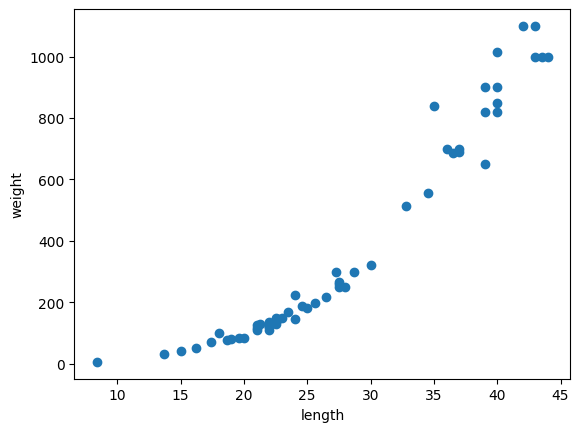

In [3]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
#농어데이터를 훈련과 테스트 데이터로 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
print(train_input.shape, test_input.shape)
#train_input = train_input.reshape(42,1)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42,) (14,)
(42, 1) (14, 1)


In [5]:
#연습
test_array = np.array([1,2,3,4])
print(test_array.shape)
test_array = test_array.reshape(2,2)
print(test_array.shape)

(4,)
(2, 2)


In [6]:
#k-최근접이웃 회귀
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))

0.992809406101064


19.157142857142862


<function matplotlib.pyplot.show(close=None, block=None)>

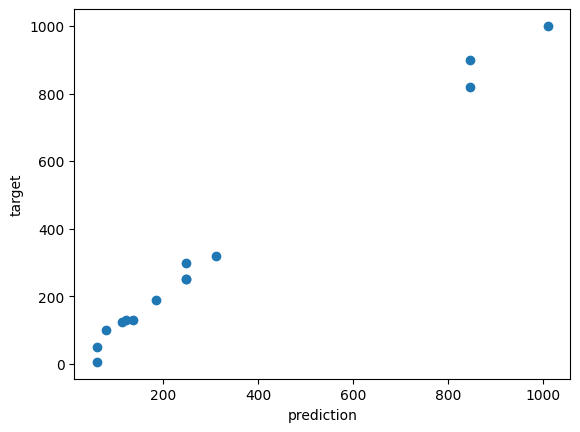

In [7]:
#예측값과 타겟의 차이 확인
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

plt.scatter(test_prediction, test_target)
plt.xlabel('prediction')
plt.ylabel('target')
plt.show

0.9698823289099254


<function matplotlib.pyplot.show(close=None, block=None)>

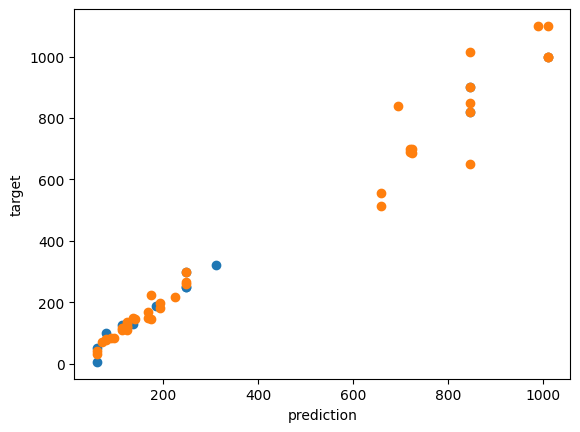

In [8]:
#훈련데이터를 얼마나 잘 예측했는지 확인(셀프 평가)
print(knr.score(train_input, train_target))
train_prediction = knr.predict(train_input)
plt.scatter(test_prediction, test_target)
plt.scatter(train_prediction, train_target)
plt.xlabel('prediction')
plt.ylabel('target')
plt.show

In [9]:
#과소적합: 훈련데이터의 평가결과(0.96)가 테스트데이터의 평가결과(0.99)보다 낮음
#과소적합을 해결하기 위해 이웃의 수를 5->3으로 변경
knr.n_neighbors = 3
#모델을 재훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


1 0.9852830341215901 0.991309195814175


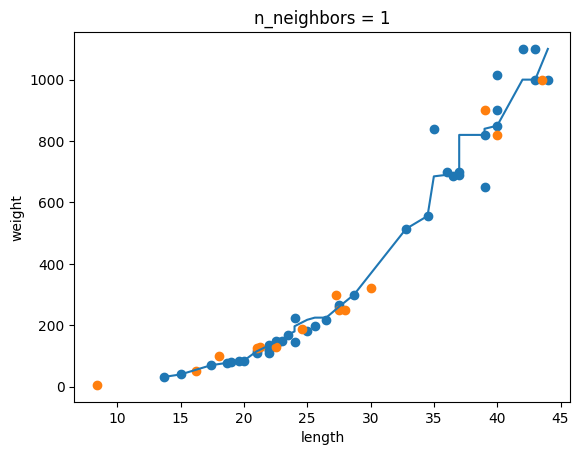

3 0.9804899950518966 0.9746459963987609


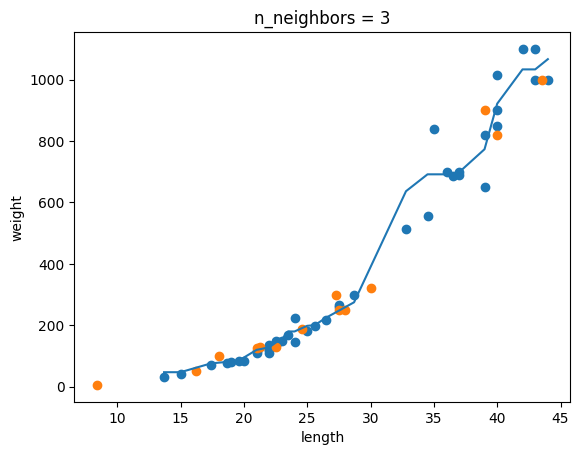

42 0.0 -0.05511282928252759


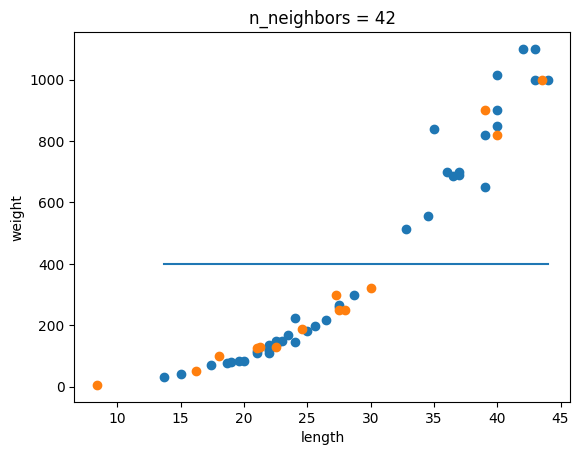

In [12]:
#이웃의 개수를 1,3,42개로 변화시키면서 과대적합, 과소적합 관찰하기
for n in [1,3,42]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    print(n, knr.score(train_input, train_target), knr.score(test_input, test_target))
    train_prediction = knr.predict(train_input)
    test_prediction = knr.predict(test_input)
    plt.scatter(train_input, train_target)
    plt.scatter(test_input, test_target)
    train_sort = np.column_stack((train_input, train_prediction))
    train_sort_ = np.sort(train_sort, axis=0)
    plt.plot(train_sort_[:,0], train_sort_[:,1])
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.title('n_neighbors = {}'.format(n))
    plt.show()

In [13]:
print(train_sort_)

[[ 13.7        400.83333333]
 [ 15.         400.83333333]
 [ 17.4        400.83333333]
 [ 18.7        400.83333333]
 [ 19.         400.83333333]
 [ 19.6        400.83333333]
 [ 20.         400.83333333]
 [ 21.         400.83333333]
 [ 21.         400.83333333]
 [ 22.         400.83333333]
 [ 22.         400.83333333]
 [ 22.         400.83333333]
 [ 22.         400.83333333]
 [ 22.         400.83333333]
 [ 22.5        400.83333333]
 [ 22.7        400.83333333]
 [ 23.         400.83333333]
 [ 23.5        400.83333333]
 [ 24.         400.83333333]
 [ 24.         400.83333333]
 [ 25.         400.83333333]
 [ 25.6        400.83333333]
 [ 26.5        400.83333333]
 [ 27.5        400.83333333]
 [ 27.5        400.83333333]
 [ 28.7        400.83333333]
 [ 32.8        400.83333333]
 [ 34.5        400.83333333]
 [ 35.         400.83333333]
 [ 36.         400.83333333]
 [ 36.5        400.83333333]
 [ 37.         400.83333333]
 [ 37.         400.83333333]
 [ 39.         400.83333333]
 [ 39.        